In [4]:
import numpy as np

In [5]:
DEFAULT_FREQ = 50.0
DEFAULT_RES = 2000

In [6]:
coef_const = {
    '2': (1.414, 0.7071), 
    '3': (3.546, 1.392, 0.2024)}

In [7]:
def calculate_capacitors(cap_const, scale):
    cap = cap_const * scale
    if cap < 0.1:
        cap = cap * 1000
        return f'{cap:.2f} n'
    else:
        return f'{cap:.2f} u'

In [8]:
def filter_analog(freq=DEFAULT_FREQ, resistor=DEFAULT_RES):
    """Función principal"""
    cap_const = 1 / (2 * np.pi * freq * resistor) * 10**6
    cap_A1 = calculate_capacitors(cap_const, coef_const['3'][0])
    cap_A2 = calculate_capacitors(cap_const, coef_const['3'][1])
    cap_A3 = calculate_capacitors(cap_const, coef_const['3'][2])
    # cap_B1 = calculate_capacitors(cap_const, 3.235)
    # cap_B2 = calculate_capacitors(cap_const, 0.309)
    
    if resistor < 1000:
        resistor_str = f'{resistor:.2f} ohm'
    elif resistor < 1E6:
        resistor_str = f'{resistor/1000:.2f} K ohm'
    else:
        resistor_str = f'{resistor/1E6:.2f} M ohm'
    
    print(f"\nComponentes para filtro analógico de frecuencia {freq} Hz y resistencia {resistor_str}:")
    print(f"Capacitor A1: {cap_A1}F")
    print(f"Capacitor A2: {cap_A2}F")
    print(f"Capacitor A3: {cap_A3}F")
    # print(f"Capacitor B1: {cap_B1}F")
    # print(f"Capacitor B2: {cap_B2}F")

In [16]:
frequency = 37.0  # Frecuencia de corte en Hz
filter_analog(freq=frequency, resistor=10000)
filter_analog(freq=frequency, resistor=20000)
filter_analog(freq=frequency, resistor=30000)
filter_analog(freq=frequency, resistor=47000)
filter_analog(freq=frequency, resistor=51000)
filter_analog(freq=frequency, resistor=68000)


Componentes para filtro analógico de frecuencia 37.0 Hz y resistencia 10.00 K ohm:
Capacitor A1: 1.53 uF
Capacitor A2: 0.60 uF
Capacitor A3: 87.06 nF

Componentes para filtro analógico de frecuencia 37.0 Hz y resistencia 20.00 K ohm:
Capacitor A1: 0.76 uF
Capacitor A2: 0.30 uF
Capacitor A3: 43.53 nF

Componentes para filtro analógico de frecuencia 37.0 Hz y resistencia 30.00 K ohm:
Capacitor A1: 0.51 uF
Capacitor A2: 0.20 uF
Capacitor A3: 29.02 nF

Componentes para filtro analógico de frecuencia 37.0 Hz y resistencia 47.00 K ohm:
Capacitor A1: 0.32 uF
Capacitor A2: 0.13 uF
Capacitor A3: 18.52 nF

Componentes para filtro analógico de frecuencia 37.0 Hz y resistencia 51.00 K ohm:
Capacitor A1: 0.30 uF
Capacitor A2: 0.12 uF
Capacitor A3: 17.07 nF

Componentes para filtro analógico de frecuencia 37.0 Hz y resistencia 68.00 K ohm:
Capacitor A1: 0.22 uF
Capacitor A2: 88.05 nF
Capacitor A3: 12.80 nF


Componentes para filtro analógico de frecuencia 35 Hz y resistencia 47.00 K ohm:
- Capacitor A1: 0.14 uF
- Capacitor A2: 68.41 nF

Componentes para filtro analógico de frecuencia 33 Hz y resistencia 51.00 K ohm:

Componentes para filtro analógico de frecuencia 34.3 Hz y resistencia 300.00 K ohm:
- Capacitor A1: 21.87 nF
- Capacitor A2: 10.94 nF

In [47]:
filter_analog(freq=35.0, resistor=470000)


Componentes para filtro analógico de frecuencia 35.0 Hz y resistencia 470.00 K ohm:
Capacitor A1: 13.68 nF
Capacitor A2: 6.84 nF


In [68]:
frequency = 40.0  # Frecuencia de corte en Hz
filter_analog(freq=frequency, resistor=10000)
filter_analog(freq=frequency, resistor=20000)
filter_analog(freq=frequency, resistor=47000)
filter_analog(freq=frequency, resistor=51000)
filter_analog(freq=frequency, resistor=68000)


Componentes para filtro analógico de frecuencia 40.0 Hz y resistencia 10.00 K ohm:
Capacitor A1: 0.56 uF
Capacitor A2: 0.28 uF

Componentes para filtro analógico de frecuencia 40.0 Hz y resistencia 20.00 K ohm:
Capacitor A1: 0.28 uF
Capacitor A2: 0.14 uF

Componentes para filtro analógico de frecuencia 40.0 Hz y resistencia 47.00 K ohm:
Capacitor A1: 0.12 uF
Capacitor A2: 59.86 nF

Componentes para filtro analógico de frecuencia 40.0 Hz y resistencia 51.00 K ohm:
Capacitor A1: 0.11 uF
Capacitor A2: 55.17 nF

Componentes para filtro analógico de frecuencia 40.0 Hz y resistencia 68.00 K ohm:
Capacitor A1: 82.74 nF
Capacitor A2: 41.37 nF


In [1]:
import sys
# Agregar el directorio raíz del proyecto al path
project_root = r'd:\Documentos\Projects\Python\EMDR-Project'
if project_root not in sys.path:
    sys.path.append(project_root)

# Importación del filtro en tiempo real
from src.utils.signal_processing import OnlineEOGFilter

SAMPLE_RATE = 125  # Frecuencia de muestreo en Hz

In [2]:
eog_filter = OnlineEOGFilter(
    fs=SAMPLE_RATE,
    hp_cutoff=0.05,        # Conserva posición ocular sostenida
    lp_cutoff=30.0,        # Banda útil para sacadas
    notch_freq=50.0,       # Soporte 50Hz o 60Hz
    notch_q=30,            # Selectividad alta
    fir_taps=101           # ~400ms retardo
)

EOG Filter configurado:
  - HP: 0.05 Hz (orden 1)
  - Notch: 50.0 Hz (Q=30)
  - LP: 30.0 Hz (FIR 101 taps)
  - Retardo estimado: 400.0 ms


In [3]:
eog_filter.get_filter_info()

{'sample_rate': 125,
 'hp_cutoff': 0.05,
 'lp_cutoff': 30.0,
 'notch_frequency': 50.0,
 'notch_q': 30,
 'notch_enabled': True,
 'fir_taps': 101,
 'estimated_delay_ms': 400.0,
 'total_filters': 3}

d:\Documentos\Projects\Python\EMDR-Project\src\utils\signal_processing.py:233: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h_total)))


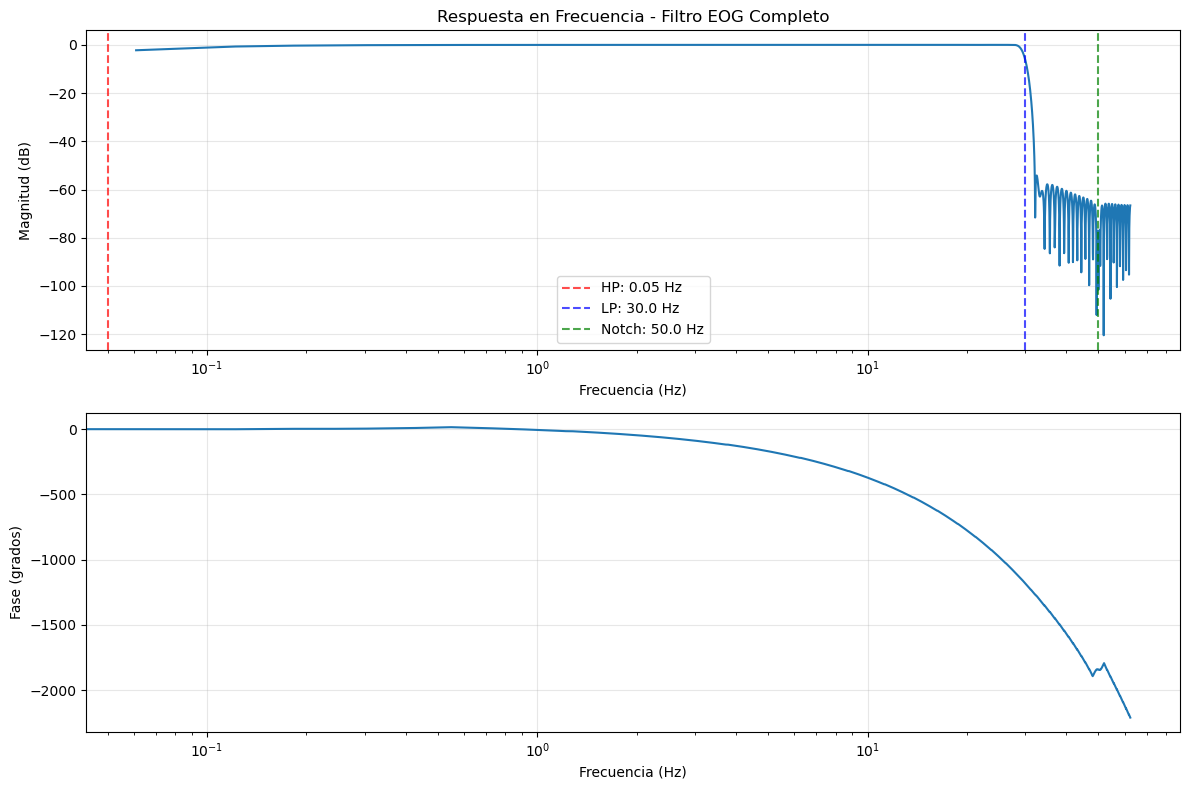

In [4]:
w, h = eog_filter.test_response(True)

In [6]:
w

array([0.00000000e+00, 6.10351562e-02, 1.22070312e-01, ...,
       6.23168945e+01, 6.23779297e+01, 6.24389648e+01])